In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from math import sin
from scipy import optimize

# Производная

In [2]:
def generate(x0, x1):
    values = np.array([])
    step = (x1 - x0) / 20

    start = 0
    while start + x0 < x1:
        value = math.sin(x0 + d)
        values = np.append(fValues, value)
        start += step

    return values

In [3]:
def derivative(array, x0, x1):
    derives = np.array([])
    step = (x1 - x0) / 20

    for i in range(len(array) - 1):
        derives = np.append(derives, (array[i + 1] - array[i]) / step)

    return derives

In [4]:
def _plot(values, x0, x1):
    x = np.linspace(x0, x1, 19)

    plt.plot(x, values, label='Производная')
    plt.xlabel('x')
    plt.ylabel('y')

    plt.legend()
    plt.show()

In [5]:
x0 = 0
x1 = 2 * math.pi

values = generate(x0, x1)

derives = derivative(values, x0, x1)

_plot(derives, x0, x1)

NameError: name 'd' is not defined

# Интегрирование

In [6]:
def integral(x0, x1):
    """
    [x0, x1] - отрезок
    """
    step = (x1 - x0) / 50
    x = x0
    fx0 = 0

    integralMean = np.array([])
    integralTrapeze = np.array([])
    integralSimpsons = np.array([])

    value_mean = 0
    value_trapez = 0
    value_simpson = 0

    while x < x1:
        value_mean += math.sin(x + step / 2) * step
        integralMean = np.append(integralMean, value_mean)

        value_trapez += step * (math.sin(x + step) + math.sin(x)) / 2
        integralTrapeze = np.append(integralTrapeze, value_trapez)

        value_simpson += 1 / 6 * step * (math.sin(x) + 4 * sin(x + step / 2) +
                                         sin(x + step))
        integralSimpsons = np.append(integralSimpsons, value_simpson)

        x += step

    x = np.linspace(x0, x1, 50)
    plt.figure(figsize=(18, 3))

    plt.subplot(131)
    plt.plot(x, integralMean, label='Mean')
    plt.legend()
    plt.subplot(132)
    plt.plot(x, integralTrapeze, label='Trapeze')
    plt.legend()
    plt.subplot(133)
    plt.plot(x, integralSimpsons, label='Simpson')
    plt.legend()

    plt.show()

 * Посмотрим на графики

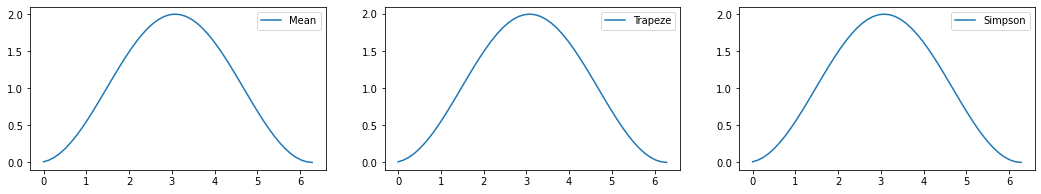

In [7]:
integral(0, 2 * math.pi)

In [8]:
def integral_(x0, x1, func, fineness=20):
    """
    [x0, x1] - отрезок
    fineness - разбиение
    """
    step = (x1 - x0) / fineness
    x = x0

    integralMean = np.array([])
    integralTrapeze = np.array([])
    integralSimpsons = np.array([])

    value_mean = 0
    value_trapez = 0
    value_simpson = 0

    index = 0
    while x < x1 and index < fineness:
        value_mean += func(x + step / 2) * step
        integralMean = np.append(integralMean, value_mean)

        value_trapez += step * (func(x + step) + func(x)) / 2
        integralTrapeze = np.append(integralTrapeze, value_trapez)

        value_simpson += 1 / 6 * step * (func(x) + 4 * func(x + step / 2) +
                                         func(x + step))
        integralSimpsons = np.append(integralSimpsons, value_simpson)

        x += step
        index += 1

    x0x1 = np.linspace(x0, x1, fineness)
    plt.figure(figsize=(18, 3))

    plt.subplot(141)
    plt.plot(x0x1, integralMean, label='Mean')
    plt.legend()

    plt.subplot(142)
    plt.plot(x0x1, integralTrapeze, label='Trapeze')
    plt.legend()

    plt.subplot(143)
    plt.plot(x0x1, integralSimpsons, label='Simpson')
    plt.legend()

    plt.subplot(144)
    plt.plot(x0x1, integralSimpsons, label='Simpson')
    plt.plot(x0x1, integralTrapeze, label='Trapeze')
    plt.plot(x0x1, integralMean, label='Mean')
    plt.legend()

    plt.show()

* Посмотрим на графики

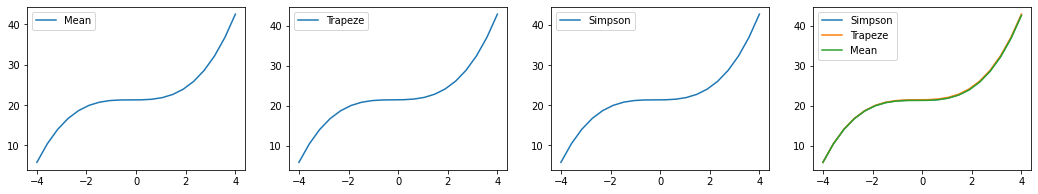

In [9]:
sinF = lambda x: math.sin(x)
x2F = lambda x: x**2

integral_(-4, 4, x2F, 20)

# Методы Эйлера для задачи Коши

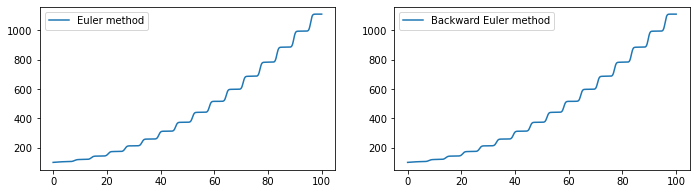

In [10]:
def methodEuler(F, u0, tau, T):
    N_t = int(round(T / tau))
    F_ = lambda t, u: np.asarray(F(t, u))
    t = np.linspace(0, N_t * tau, N_t + 1)
    u = np.zeros((N_t + 1, len(u0)))
    u[0] = np.array(u0)
    for n in range(N_t):
        u[n + 1] = u[n] + tau * F_(t[n], u[n])

    return u, t


def backwardEuler(F, u0, tau, T):
    N_t = int(round(T / tau))
    F_ = lambda t, u: np.asarray(F(t, u))
    t = np.linspace(0, N_t * tau, N_t + 1)
    u = np.zeros((N_t + 1, len(u0)))
    u[0] = np.array(u0)

    def phi(z, t, v):
        return z - tau * F_(t, z) - v

    for n in range(N_t):
        u[n + 1] = optimize.fsolve(phi, u[n], args=(t[n], u[n]))

    return u, t


def func(t, u):
    return t**np.sin(t)


u, t = methodEuler(F=func, u0=[100], tau=0.1, T=100)
u1, t1 = backwardEuler(F=func, u0=[100], tau=0.1, T=100)

plt.figure(figsize=(18, 3))
plt.subplot(131)
plt.plot(t, u, label='Euler method')
plt.legend()

plt.subplot(132)
plt.plot(t1, u1, label='Backward Euler method')
plt.legend()

plt.show()

# Runge–Kutta method

In [11]:
def f(x, y):
    return x * np.sqrt(y)


def theoretical(x):
    return (x**2 + 4)**2 / 16

In [12]:
a = 0
b = 10
h = 0.1
n = int((b - a) / 0.1)

x = np.linspace(a, b, n)
y = np.zeros(n, float)
y[0] = 1.

for i in range(1, n):
    k1 = f(x[i - 1], y[i - 1])
    k2 = f(x[i - 1] + h / 2, y[i - 1] + h * k1 / 2)
    k3 = f(x[i - 1] + h / 2, y[i - 1] + h * k2 / 2)
    k4 = f(x[i - 1] + h, y[i - 1] + h * k3)
    y[i] = y[i - 1] + h * (k1 + 2 * k2 + 2 * k3 + k4) / 6

* Посмотрим на график

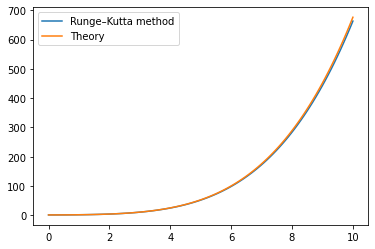

In [13]:
plt.plot(x, y, label='Runge–Kutta method')
plt.plot(x, theoretical(x), label="Theory")
plt.legend()
plt.show()